# Módulo 28: Introducción a la Clasificación
- Introducción a Regresión Logística
    - Modela la probabilidad de que un registro pertenezca a una de dos alternativas
    - La variable target es binaria
    - Se genera una ecuación con coeficientes de las variables intependientes que forman una curva o "sigmoide" con la probabilidad por cada evento
    - Ecuación
        - p(x) = 1 / (a + e**(b0 + b1 x1 + b2 x2 + ...))
        - b0 - intercept
        - b1 empieza la cadena de variables independientes

- Clasificación multiple
    - Si se tiene múltiples clases, se debería tener una ecuación de probabilidad por cada clase
    - Además, la suma de las probabilidades de cada clase debería sumar 100%

---

## EDA y Preprocesamiento
Descripción de las columnas del datset:
- Attrition - *Variable dependiente*, indica si el empleado salió o no
- BuisnessTravel - Definiciones de la frecuencia de viaje
- Department - Unidad de negocio
- DistanceFromHome - Distancia en millas de su casa
- Education - Nivel Educacional (#)
- EducationField - Campo de educación
- Employee Count - 1
- Gender - Masculino/Femenino
- JobLevel - Nivel de trabajo
- JobRole - Cargo
- MaritalStatus - Estado civil
- MonthlyIncome - Ingreso mensual
- NumCompaniesWorked - No. de empresas en las que trabajó antes
- Over18 - Si tiene más de 18 años
- PercentSalaryHike - El último alza de salario
- StandardHours - Cuántas horas estándar (#)
- StockOptionLevel - Nivel de entrega de ESOP (#)
- TotalWorkingYears - # de años trabajados en la empresa
- TrainintTimesLastYear - Número de capacitaciones que tomó el año anterior
- YearsAtCompany - Años en la empresa (#)
- YearsSinceLastPromotion - Alos desde la última promoción
- YearsWithCurrManager - Años con su manager actual

* La idea del modelo es predecir si un empleado se va a ir de la empresa o no (Attrition)

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df = pd.read_csv('general_data.csv')
df.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2018,52,No,Travel_Rarely,Sales,1,3,Life Sciences,1,2019,Male,...,7.0,Y,18,8,1,18.0,6,8,4,0
2212,52,No,Travel_Rarely,Research & Development,5,2,Life Sciences,1,2213,Female,...,9.0,Y,18,8,1,12.0,6,5,0,4
3781,45,No,Travel_Rarely,Research & Development,4,3,Medical,1,3782,Female,...,1.0,Y,22,8,0,10.0,2,10,7,7
609,50,No,Travel_Frequently,Research & Development,25,4,Life Sciences,1,610,Female,...,2.0,Y,24,8,1,32.0,2,2,2,2
986,30,No,Travel_Frequently,Sales,9,3,Life Sciences,1,987,Male,...,0.0,Y,12,8,1,10.0,2,9,0,7


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [182]:
df.shape

(4410, 24)

In [183]:
# Número de valores diferentes
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

#### Insights
- Será necesaria imputación de datos para algunos registros en NumCompaniesWorked y TotalWorkedYears
- Los campos EmployeeCount, Over18 y StandardHours se pueden eliminar; no van a aportar nada al modelo por presentar el mismo valor para todos los registros
- EmployeeID es el id del empleado, no aporta información al modelo, se puede eliminar

In [184]:
# Validación de datos

# Datos nulos
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Imputación de Datos
- Se decidió tomar tanto para NumCompaniesWorked como apra TotalWorkinYears, el número promedio para imputar en los registros donde faltan estos campos

In [185]:
# Imputación de datos
# Reemplazar los registros con nulos por el promedio general
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(int(np.mean(a=df['NumCompaniesWorked'])))
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(int(np.mean(a=df['TotalWorkingYears'])))

In [186]:
print(f'Total number of null spaces {df.isnull().sum().sum()}')

Total number of null spaces 0


### Análisis de Correlación

C:\Users\USER\AppData\Local\Temp\ipykernel_12628\3473999359.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method='pearson')


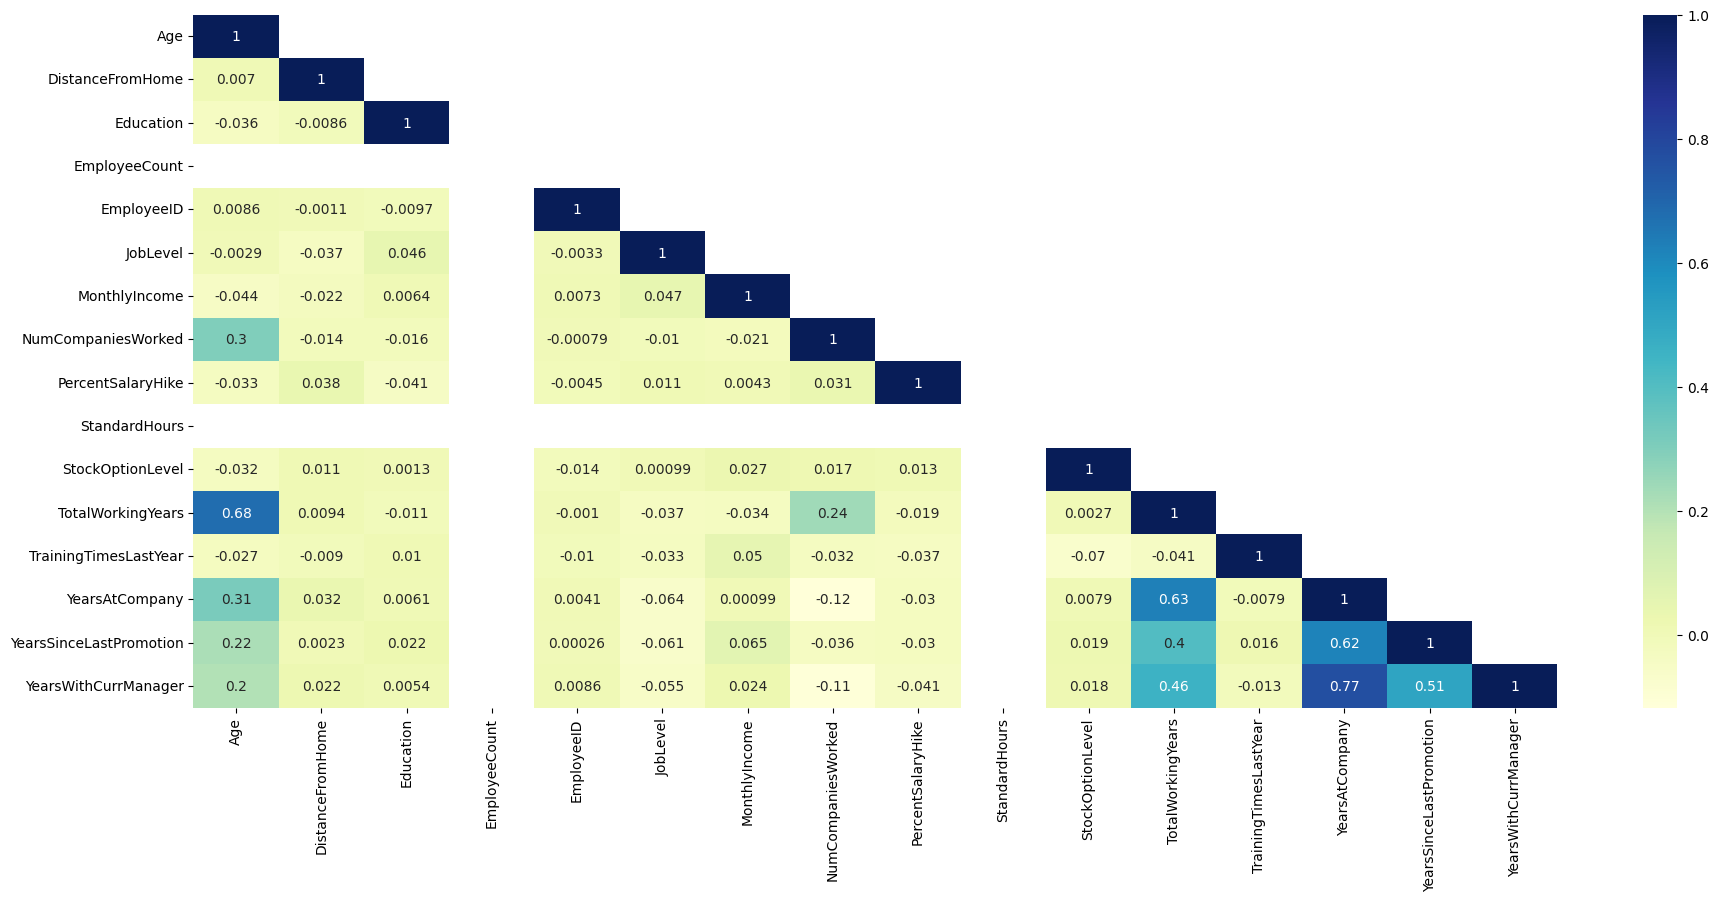

In [187]:
plt.figure(figsize=(22,9))
corr_df = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmp = sns.heatmap(data=df_lt, cmap='YlGnBu', annot=True)

#### Insights
- No existe multicolinealidad, pero existen relaciones curiosas entre los campos, TotalWorkingYears - YearsAtCompany - YearsWithCurrManager
---
### Gráfico por Distribución

In [188]:
numerics = ['int16', 'int32', 'int64', 'float64']
df.select_dtypes(include=numerics).sample(5)

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
972,24,3,3,1,973,1,14160,1.0,15,8,1,6.0,3,6,1,2
1128,26,2,2,1,1129,2,20800,0.0,13,8,0,8.0,6,7,7,6
2079,50,25,4,1,2080,2,32020,2.0,24,8,1,32.0,2,2,2,2
2137,42,23,4,1,2138,1,64470,6.0,13,8,0,18.0,3,1,0,0
3402,30,2,3,1,3403,2,40000,4.0,12,8,0,7.0,5,5,0,1


In [189]:
# Se seleccional as columnas de tipo numérico
cols_num = df.columns[[np.issubdtype(dt, np.number) for dt in df.dtypes]]
cols_num

Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

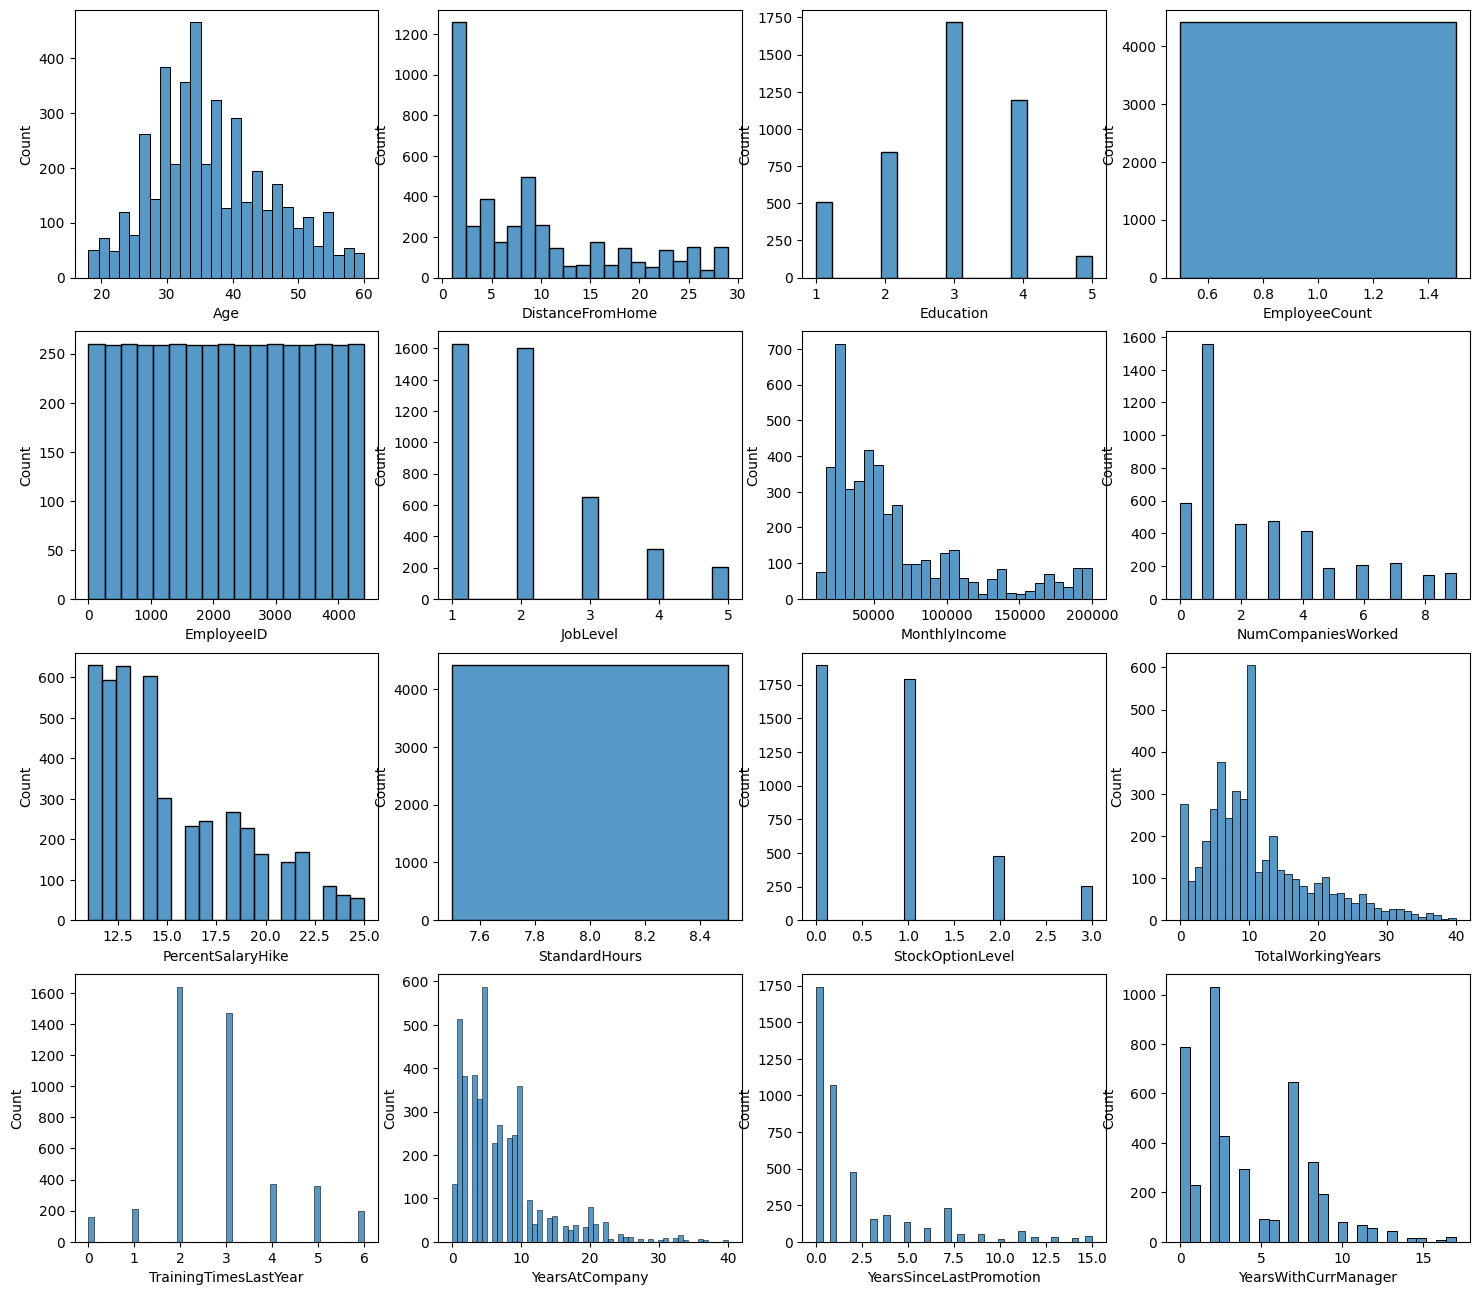

In [190]:
# Gráfico exploratoria de todas las columnas numéricas (16 - cols_num)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(data=df, x=column, ax=ax[i//4, i%4], kde=False)

#### Insights
- Las columas YearsAtCompany, TotalWorkingYears, MonthlyIncome parecen estar sesgadas
- El rango de la variable MonthlyIncome se podría estandaizar (está en cientos de miles a comparación de otras que estan en decenas o unidades)
- Las columnas StandardHours, EmployeeId no aportan ningún valor al modelo, se pueden eliminar
- EmployeeCount siendo siempre uno seguramente es utilizado para hacer cuentas de empleados y no usar el EmployeeID u otros valores
---
## Análisis Bivriado

In [191]:
df.groupby(['YearsAtCompany']).mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_12628\2093855610.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['YearsAtCompany']).mean()


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
YearsAtCompany,,,,,,,,,,,,,,,
0,31.227273,7.204545,3.227273,1.0,2157.613636,1.818182,62946.136364,2.916667,16.159091,8.0,0.909091,5.840909,3.090909,0.000000,0.000000
1,35.058480,8.040936,2.853801,1.0,2198.777778,2.140351,64813.040936,2.951267,14.877193,8.0,0.789474,7.458090,2.742690,0.076023,0.076023
2,34.708661,9.960630,2.952756,1.0,2215.937008,2.039370,60889.370079,3.519685,15.503937,8.0,0.834646,7.448819,2.771654,1.677165,1.740157
3,35.125000,10.015625,2.992188,1.0,2192.351562,2.132812,70544.843750,3.023438,15.125000,8.0,0.781250,8.125000,2.898438,0.703125,1.867188
4,36.572727,10.790909,2.900000,1.0,2254.445455,2.381818,62060.545455,3.112121,15.700000,8.0,0.736364,8.863636,2.672727,0.754545,2.272727
5,36.862245,8.663265,2.821429,1.0,2200.653061,2.040816,60875.357143,2.770408,15.056122,8.0,0.795918,10.035714,2.744898,0.760204,2.826531
6,35.447368,8.407895,2.842105,1.0,2178.013158,1.960526,66514.605263,2.368421,15.565789,8.0,0.776316,8.653509,3.065789,0.736842,3.026316
7,35.988889,9.911111,2.811111,1.0,2199.677778,2.100000,65454.666667,2.859259,15.333333,8.0,0.677778,12.500000,2.844444,2.744444,5.977778
8,36.987500,8.737500,2.850000,1.0,2075.462500,1.925000,64735.875000,2.687500,15.450000,8.0,0.937500,11.004167,2.862500,3.225000,5.800000


In [192]:
df.groupby(['JobLevel']).mean().T

C:\Users\USER\AppData\Local\Temp\ipykernel_12628\1067281539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['JobLevel']).mean().T


JobLevel,1,2,3,4,5
Age,36.775322,37.367041,36.266055,36.377358,37.579710
DistanceFromHome,9.381215,9.415730,8.784404,8.273585,8.681159
Education,2.841621,2.945693,2.940367,3.047170,2.927536
EmployeeCount,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeID,2189.810313,2237.709738,2196.220183,2142.886792,2205.202899
MonthlyIncome,62677.421731,65506.479401,63545.321101,77940.754717,64698.405797
NumCompaniesWorked,2.669122,2.742821,2.772171,2.443396,2.603865
PercentSalaryHike,14.963168,15.475655,15.412844,14.783019,15.101449
StandardHours,8.000000,8.000000,8.000000,8.000000,8.000000
StockOptionLevel,0.823204,0.758427,0.793578,0.716981,0.956522


In [193]:
df.groupby(['StockOptionLevel']).mean()[['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears']]

C:\Users\USER\AppData\Local\Temp\ipykernel_12628\2000770076.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['StockOptionLevel']).mean()[['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears']]


,Age,DistanceFromHome,MonthlyIncome,TotalWorkingYears
StockOptionLevel,,,,
0,36.939778,9.169572,63077.606973,11.159007
1,37.278523,9.156040,66549.630872,11.378076
2,36.354430,9.025316,66898.924051,11.810127
3,35.376471,9.929412,65382.470588,10.494118


## Feature Engineering

In [194]:
# Genera una copia del df
df2 = df.copy()

In [195]:
# ELIMINAR COLUMNAS NO NECESARIAS 
df2.drop(columns=['EmployeeID', 'StandardHours', 'Over18', 'EmployeeCount'], inplace=True)
df2.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
3753,49,No,Travel_Rarely,Research & Development,5,4,Life Sciences,Female,1,Research Scientist,Married,34240,4.0,11,0,10.0,3,3,1,2
172,35,No,Travel_Rarely,Research & Development,15,2,Medical,Female,2,Laboratory Technician,Single,54060,0.0,12,1,6.0,2,5,4,3
3198,23,No,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,1,Healthcare Representative,Married,76370,2.0,11,1,5.0,3,3,0,2


In [196]:
# CAMBIAR COLUMNAS OBJECT POR CATEGORY
df2['BusinessTravel'] = df2['BusinessTravel'].astype('category')
df2['Department'] = df2['Department'].astype('category')
df2['EducationField'] = df2['EducationField'].astype('category')
df2['Gender'] = df2['Gender'].astype('category')

# Cambiar columnas NumCompaniesWorked a entero
df2['NumCompaniesWorked'] = df2['NumCompaniesWorked'].fillna(value=0).astype('int')

In [197]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   object  
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   Gender                   4410 non-null   category
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   object  
 10  MaritalStatus            4410 non-null   object  
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4410 non-null   int32   
 13  PercentSalaryHike        4410 non-null   int64   
 14  StockOpt

In [198]:
# BALANCEO DE CLASES - PASAR LAS CLASES QUE TENGAN REPRESENTACIÓN EN MENOS DEL 5% DE LOS CASOS EN UNA CATEGORÍA DE OTHER
print(df2['EducationField'].value_counts(),'\n')
print(df2['BusinessTravel'].value_counts(), '\n')
print(df2['Department'].value_counts(), '\n')


Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64 

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64 

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64 



In [199]:
# Cambio de tipo de columna de Attrition (1/0) - Automático

'''
Este cambio de variables categóricas a 1/0 se puede hacer de muchas maneras, una es con .replace() lo cual se recomienda cuando la variable tiene pocas categorías puesto que te proporciona más control sobre cómo acomodar los valores (cuál es 1 y cuál es 0).
Otra opción es generar dummies. En este caso se uso .cat.codes, lo cual le asigna un código a cada una de las categorías que encuentre, esto es mejor cuando se tienen muchas categorías ya que es más rapido que ir asignando el valor con el que se tiene que reemplazar
utilizando .replace()
'''

df2.Gender = df2.Gender.astype('category').cat.codes
df2.BusinessTravel = df2.BusinessTravel.astype('category').cat.codes
df2.Department = df2.Department.astype('category').cat.codes
df2.EducationField = df2.EducationField.astype('category').cat.codes
df2.JobRole = df2.JobRole.astype('category').cat.codes
df2.MaritalStatus = df2.MaritalStatus.astype('category').cat.codes
df2.Attrition = df2.Attrition.astype('category').cat.codes


In [200]:
# Estandarizar las columnas que lo necesiten (Income)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['MonthlyIncome_scale'] = scaler.fit_transform(df2[['MonthlyIncome']])
df2.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_scale
2279,47,0,2,1,8,4,3,0,2,8,...,23660,3,17,0,11.0,5,5,1,2,-0.879010
2353,30,0,2,1,4,3,3,0,1,5,...,21210,1,13,1,6.0,2,6,1,1,-0.931067
3675,25,0,2,1,7,4,1,1,1,7,...,22160,2,13,3,6.0,2,3,1,2,-0.910881


In [201]:
# Opcional - Eliminar la variable que se acaba de estandarizar
df2.drop(columns=['MonthlyIncome'], inplace=True)

## Data Split

In [202]:
from sklearn.model_selection import train_test_split

x = df2.drop(columns=['Attrition'])
y = df2['Attrition']

# En este caso no es necesario, pero habría que convertir variables categóricas en dummy variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)


## Regresión Logística

In [203]:
# Ref https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6
print(df2['Attrition'].value_counts(normalize=True))

0    0.838776
1    0.161224
Name: Attrition, dtype: float64


Como se puede ver, en el dataset hay una pequeña cantidad de respuestas posivitas a comparación de la cantidad de respuestas negativas

https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

https://machinelearningmastery.com/cost-sensitive-logistic-regression/

In [204]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(x_train, y_train)

y_predict = model.predict(X=x_test)

In [205]:
# Build a dataset with original and predicted
z = pd.DataFrame()
z['Attrition real'] = y_test
z['Attrition prediction'] = y_predict
z.sample(20)

,Attrition real,Attrition prediction
855,0,0
2617,0,0
1856,0,1
1050,0,0
2416,1,0
1093,0,0
481,0,1
2769,0,0
2312,0,1
191,0,0


In [206]:
# Tenera los coeficientes de la ecuación
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = x.columns

# Incluir el intercept
coef_df['Intercept'] = model.intercept_
coef_df.T 

,0
Age,-0.026638
BusinessTravel,0.018698
Department,-0.284434
DistanceFromHome,0.001541
Education,-0.040420
EducationField,-0.079891
Gender,0.124787
JobLevel,-0.073838
JobRole,0.052852
MaritalStatus,0.624672


### Matriz de confusión

Text(0.5, 1.0, 'Matriz de Confusión')

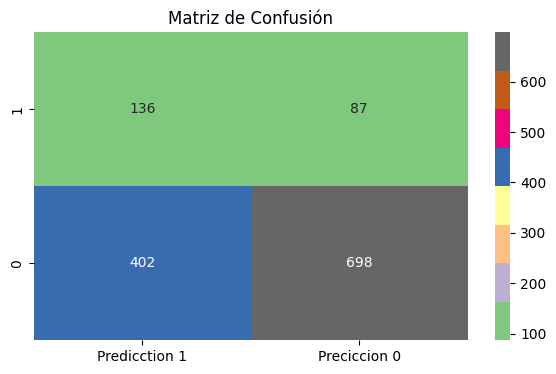

In [207]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index=[i for i in ['1', '0']], 
                     columns=[i for i in ['Predicction 1', 'Preciccion 0']])

plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True, cmap='Accent', fmt='d').set_title('Matriz de Confusión')

In [208]:
# Calculo manual de falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos
TP = df_cm.iloc[0][0]
FP = df_cm.iloc[0][1]
FN = df_cm.iloc[1][0]
TN = df_cm.iloc[1][1]

In [209]:
# Medidas del modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

model_score = accuracy_score(y_test, y_predict)
recall_score = recall_score(y_test, y_predict)
precision_score = precision_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)

print('Medidas del modelo')
print('----------------------')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Accuracy = {0:0.2f}'.format(roc_auc_score(y_test, y_predict)))


Medidas del modelo
----------------------
Accuracy = 0.63
Precision = 0.25
Recall = 0.61
F1 Score = 0.36
Accuracy = 0.62


In [210]:
# Un nuevo intento
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

# Hacer predicción en con x_test
y_predict = model.predict(x_test)

In [211]:
# Medidas del modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

model_score = accuracy_score(y_test, y_predict)
recall_score = recall_score(y_test, y_predict)
precision_score = precision_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)

print('Medidas del modelo')
print('----------------------')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Accuracy = {0:0.2f}'.format(roc_auc_score(y_test, y_predict)))

Medidas del modelo
----------------------
Accuracy = 0.84
Precision = 0.82
Recall = 0.06
F1 Score = 0.12
Accuracy = 0.53
